In [110]:
%load_ext autoreload
%autoreload 2
from utils import *
import itertools
from IPython.display import display, HTML
from scipy.stats import spearmanr
from scipy.stats import pearsonr
ins = BrainSpan()

[autoreload of utils failed: Traceback (most recent call last):
  File "/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Users/jiayao/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/jiayao/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/jiayao/Work/BrainDisorders/src/utils.py", line 20, in <module>
    import mygene
  File "/Users/jiayao/anaconda3/lib/python3.7/site-packages/mygene/__init__.py", line

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
Genes = {}
hand = open("unifiedmodel/RecLGDgenes.gencode.v19.gtf", 'rt')
GeneIDs = []
for l in hand:
    if l.startswith("#"):
        continue
    llist = l.strip().split("\t")
    info = gtf_info_parser(llist[8]) 
    CHR = llist[0].lstrip("chr")
    strand = llist[6]
    start = int(llist[3])
    end = int(llist[4])
    if llist[2] == "gene":
        gene_name = info["gene_name"]
        gene_id = info["gene_id"].split(".")[0]
        Genes[gene_name] = GTFGene(gene_name, gene_id, strand)
        GeneIDs.append(gene_id)
GeneIDs = set(GeneIDs)

In [80]:
print(len(GeneIDs), GeneIDs)

28 {'ENSG00000061676', 'ENSG00000130749', 'ENSG00000167216', 'ENSG00000163625', 'ENSG00000095787', 'ENSG00000136531', 'ENSG00000148737', 'ENSG00000157540', 'ENSG00000101126', 'ENSG00000117139', 'ENSG00000171587', 'ENSG00000160305', 'ENSG00000197724', 'ENSG00000079841', 'ENSG00000100354', 'ENSG00000005483', 'ENSG00000136535', 'ENSG00000132510', 'ENSG00000100888', 'ENSG00000049618', 'ENSG00000146830', 'ENSG00000167522', 'ENSG00000145362', 'ENSG00000143442', 'ENSG00000273079', 'ENSG00000173575', 'ENSG00000123066', 'ENSG00000114861'}


In [81]:
Trans_TPM = "/Users/jiayao/Work/BrainDisorders/data/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt"
out = open("transcripts/GTEx_rec_transcript_tpm.txt", 'wt')
for l in open(Trans_TPM, 'rt'):
    llist = l.strip().split("\t")
    if l.startswith("trans"):
        out.write(l)
    elif llist[1].split(".")[0] in GeneIDs:
        out.write(l)

In [82]:
SampleAtt = pd.read_csv("../data/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")
BrainSampleAtt = SampleAtt[SampleAtt["SMTS"]=="Brain"]

In [83]:
BrainSampleAtt["SAMPID"].values

array(['GTEX-1117F-3226-SM-5N9CT', 'GTEX-111FC-3126-SM-5GZZ2',
       'GTEX-111FC-3326-SM-5GZYV', ..., 'GTEX-ZYY3-3126-SM-5SI9L',
       'GTEX-ZZPT-2926-SM-5EQ5S', 'GTEX-ZZPT-3026-SM-5GZXH'], dtype=object)

In [84]:
Headers = ["transcript_id", "gene_id"]+list(BrainSampleAtt["SAMPID"].values)

In [85]:
Headers = [x for x in Headers]

In [86]:
print(len(Headers))

2078


In [87]:
print(df.columns.values)

['KEY' 'familyId' 'vcfVariant' 'inChild' 'effectGene' 'effectType'
 'gender' 'VIQ' 'NVIQ' 'ExonID' 'GeneExp.amean' 'ExonExp.amean'
 'GenePrenatalExp.amean' 'ExonPrenatalExp.amean' 'GenePostnatalExp.amean'
 'ExonPostnatalExp.amean' 'Functional' 'DOM.TRUNC.FRAC' 'DOM.TRUNC' 'GERP'
 'Rel.exp.amean' 'Rel.exp.gmean' 'Rel.exp.prenatal' 'Rel.exp.postnatal'
 'Prenatal.Bias' 'phyloP100way' 'phastCons100way' 'gender1' 'Age' 'Dosage'
 'Exons' 'Transcripts']


In [113]:
GTEx_rec_transcript_tpm = pd.read_csv("transcripts/GTEx_rec_transcript_tpm.txt", delimiter="\t")
print(GTEx_rec_transcript_tpm.shape)

(329, 11690)


In [114]:
GTEx_rec_transcript_tpm.head(2)

,transcript_id,gene_id,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2226-SM-5N9CH,GTEX-1117F-2426-SM-5EGGH,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENST00000257745.4,ENSG00000005483.15,9.74,6.2,19.52,9.93,4.9,13.9,17.0,19.6,...,6.24,3.48,8.67,2.78,13.81,15.47,5.08,13.13,4.12,7.92
1,ENST00000311117.3,ENSG00000005483.15,0.44,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.33,0.00,0.00,0.01,0.00,0.00,0.69,1.21,1.06


In [104]:
Genes = LoadGTF4FracIso()
Jiayao_features = LoadVar4FracIso(Genes)

In [108]:
import itertools
IQ_diffs = []
FracIsoComs = []
for gene in list(set(Jiayao_features["effectGene"].values)):
    df = Jiayao_features[(Jiayao_features["effectGene"]==gene)]
    IQ_diff_gene = []
    for row1, row2 in itertools.combinations(df.iterrows(), r=2):
        row1 = row1[1]
        row2 = row2[1]
        IQ_diff = abs(row1["NVIQ"]- row2["NVIQ"])
        Iso1 = row1["Transcripts"]
        Iso2 = row2["Transcripts"]
        FracIsoCom = len(set(Iso1).intersection(set(Iso2))) / len(set(Iso1).union(set(Iso2)))
        #if FracIsoCom == 1:
        #    print(row1["Transcripts"], row2["Transcripts"])
        #print(FracIsoCom)
        FracIsoComs.append(FracIsoCom)
        IQ_diff_gene.append(IQ_diff)
    IQ_diff_gene = [x/np.mean(IQ_diff_gene) for x in IQ_diff_gene]
    IQ_diffs.extend(IQ_diff_gene)

['ENST00000466639.1', 'ENST00000427143.2', 'ENST00000400274.1', 'ENST00000318711.7', 'ENST00000435722.3', 'ENST00000417564.2', 'ENST00000457905.3'] ['ENST00000466639.1', 'ENST00000427143.2', 'ENST00000400274.1', 'ENST00000318711.7', 'ENST00000435722.3', 'ENST00000417564.2', 'ENST00000457905.3']
['ENST00000404019.2', 'ENST00000400454.1'] ['ENST00000404019.2', 'ENST00000400454.1']
['ENST00000404019.2', 'ENST00000400454.1'] ['ENST00000404019.2', 'ENST00000400454.1']
['ENST00000404019.2', 'ENST00000400454.1'] ['ENST00000404019.2', 'ENST00000400454.1']
['ENST00000557381.1', 'ENST00000557759.1', 'ENST00000394196.4'] ['ENST00000557381.1', 'ENST00000557759.1', 'ENST00000394196.4']
['ENST00000414678.2', 'ENST00000350026.5', 'ENST00000346085.5', 'ENST00000367148.1', 'ENST00000275248.4'] ['ENST00000414678.2', 'ENST00000350026.5', 'ENST00000346085.5', 'ENST00000367148.1', 'ENST00000275248.4']
['ENST00000357398.3', 'ENST00000283256.6', 'ENST00000375437.2', 'ENST00000375427.2'] ['ENST00000357398.3',

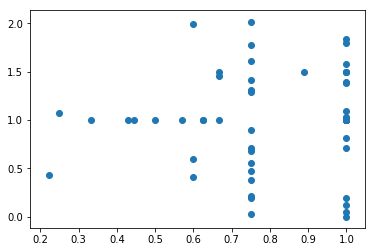

In [109]:
plt.scatter(FracIsoComs, IQ_diffs)

In [103]:
Jiayao_features[Jiayao_features["NVIQ"]<40]

,KEY,familyId,vcfVariant,inChild,effectGene,effectType,gender,VIQ,NVIQ,ExonID,...,Rel.exp.prenatal,Rel.exp.postnatal,Prenatal.Bias,phyloP100way,phastCons100way,gender1,Age,Dosage,Exons,Transcripts
0,13545-20:49509095,13545,20:49509094:G:GT,pM,ADNP,frame-shift,M,23.0,38.0,41150,...,1.215442,1.325670,1.423534,2.813101,0.732081,1,61.0,56.455400,"[ENSE00001523629.2, ENSE00001455631.1]","[ENST00000396032.3, ENST00000349014.3, ENST000..."
12,14233-14:21859176,14233,14:21859175:A:AT,pM,CHD8,frame-shift,M,6.0,19.0,40582,...,1.976787,2.532729,0.535774,2.914479,0.955658,1,201.0,36.206397,[ENSE00001096840.1],"[ENST00000430710.3, ENST00000557364.1, ENST000..."
16,13844-14:21871178,13844,14:21871178:G:A,pM,CHD8,nonsense,M,20.0,34.0,40600,...,0.960060,0.905531,0.977669,5.203969,0.897051,1,99.0,72.726077,"[ENSE00002439310.1, ENSE00001739488.1]","[ENST00000430710.3, ENST00000555935.1, ENST000..."
18,13900-14:21895990,13900,14:21895989:ACTCTTGCACGTCCCATCACAGTAGCAAGGAGTA...,pM,CHD8,splice-site,M,10.0,27.0,40613,...,0.674465,0.665753,0.912067,3.102821,0.911194,1,103.0,80.476994,[ENSE00001422532.1],"[ENST00000430710.3, ENST00000557364.1, ENST000..."
21,13735-21:41414331,13735,21:41414330:A:AT,pM,DSCAM,frame-shift,M,30.0,27.0,179246,...,2.113173,2.705670,0.259018,5.494337,0.929677,1,109.0,53.158800,[ENSE00001322604.3],"[ENST00000404019.2, ENST00000400454.1]"
29,12817-3:71050171,12817,3:71050170:C:CT,pM,FOXP1,frame-shift,M,37.0,34.0,66477,...,1.827491,1.666753,1.212707,6.595636,0.996364,1,113.0,74.447293,[ENSE00001258621.2],"[ENST00000497355.1, ENST00000318789.4, ENST000..."
44,14416-12:116424952,14416,12:116424952:C:T,pM,MED13L,nonsense,M,24.0,36.0,79524,...,1.396060,1.165546,1.866250,5.199806,0.930417,1,186.0,47.217968,[ENSE00000835030.1],[ENST00000281928.3]
